In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

TensorFlow 2.x selected.


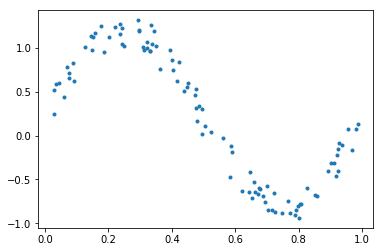

In [ ]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.plot(X, Y, '.')
plt.show()

In [ ]:
# 1-100-100-1
inputs = keras.Input(shape=(1,))
d1 = layers.Dense(100, activation='relu')
d2 = layers.Dense(100, activation='relu')
d3 = layers.Dense(1)
outputs = d3(d2(d1(inputs)))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
model.fit(X, Y, epochs=500)

Train on 100 samples
Epoch 1/500
100/100 [==============================] - 1s 15ms/sample - loss: 0.5838
Epoch 2/500
100/100 [==============================] - 0s 201us/sample - loss: 0.5309
Epoch 3/500
100/100 [==============================] - 0s 182us/sample - loss: 0.5551
Epoch 4/500
100/100 [==============================] - 0s 176us/sample - loss: 0.4690
Epoch 5/500
100/100 [==============================] - 0s 179us/sample - loss: 0.4499
Epoch 6/500
100/100 [==============================] - 0s 176us/sample - loss: 0.3442
Epoch 7/500
100/100 [==============================] - 0s 178us/sample - loss: 0.3225
Epoch 8/500
100/100 [==============================] - 0s 178us/sample - loss: 0.3579
Epoch 9/500
100/100 [==============================] - 0s 176us/sample - loss: 0.2425
Epoch 10/500
100/100 [==============================] - 0s 172us/sample - loss: 0.2436
Epoch 11/500
100/100 [==============================] - 0s 205us/sample - loss: 0.2968
Epoch 12/500
100/100 [==========

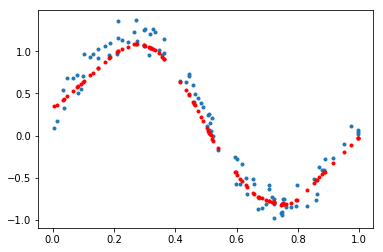

In [ ]:
Z = model.predict(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
itrain = []
itest = []
X = df.iloc[:, :4].values
L = df.iloc[:, -1].values
classes = np.unique(L)
split = 0.5
Y = []
for c in classes:
  Idx = L == c
  idx = np.where(Idx)[0]
  sp = int(split * len(idx))
  itrain.extend(idx[:sp])
  itest.extend(idx[sp:])
  Y.append(Idx.astype(np.int)) # one-hot
Y = np.array(Y).T

In [ ]:
# 4-100-100-3
inputs = keras.Input(shape=(4,))
d1 = layers.Dense(100, activation='relu')
d2 = layers.Dense(100, activation='relu')
d3 = layers.Dense(3)
outputs = d3(d2(d1(inputs)))
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

In [ ]:
model.fit(X[itrain], Y[itrain], epochs=500)

Train on 75 samples
Epoch 1/500
75/75 [==============================] - 0s 296us/sample - loss: 0.0558
Epoch 2/500
75/75 [==============================] - 0s 217us/sample - loss: 0.0101
Epoch 3/500
75/75 [==============================] - 0s 183us/sample - loss: 0.0177
Epoch 4/500
75/75 [==============================] - 0s 206us/sample - loss: 0.0319
Epoch 5/500
75/75 [==============================] - 0s 210us/sample - loss: 0.0091
Epoch 6/500
75/75 [==============================] - 0s 196us/sample - loss: 0.0135
Epoch 7/500
75/75 [==============================] - 0s 171us/sample - loss: 0.0107
Epoch 8/500
75/75 [==============================] - 0s 177us/sample - loss: 0.0099
Epoch 9/500
75/75 [==============================] - 0s 189us/sample - loss: 0.0083
Epoch 10/500
75/75 [==============================] - 0s 202us/sample - loss: 0.0124
Epoch 11/500
75/75 [==============================] - 0s 189us/sample - loss: 0.0099
Epoch 12/500
75/75 [==============================] - 

In [ ]:
Z = model.predict(X[itest])

In [ ]:
np.sum(tf.argmax(Z, axis=1) == tf.argmax(Y[itest], axis=1)) / len(Z)

0.8666666666666667